# 2D Laplace equation using iterative methods

In [Exercise 9](9_2D_laplace_demo), we solved the 2D Laplace equation for the steady-state heat distribution using Fourier series.
Now, we will show how you can solve the Laplace equation using iterative schemes such as the [Jacobi method](https://en.wikipedia.org/wiki/Jacobi_method) and [Gauss-Seidel method](https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method).

## Summary of commands

In this exercise, we will demonstrate the following:
- [`np.meshgrid(x, y)`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) and [`ax.pcolormesh(X, Y, C)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html), as we saw in [Exercise 9](9_2D_laplace_demo).
- using a `while` loop to iterate until convergence.

## Demo

![2D Laplace](../assets/fig/12_heat-square.png)

A square cooling plate of length $1$ is maintained at
$0$ °C.
When the machine turns on, two sides are heated to $100$ °C, as shown in the figure.
Using $10$ nodes and $30$ nodes, use the Jacobi iteration method to plot the steady-state temperature after the machine turns on, to within a $1\%$ error.
The iteration scheme is

$$ u_{i,j}^{n+1} = \dfrac{u_{i-1,j}^{n} + u_{i+1,j}^{n} + u_{i,j-1}^{n} + u_{i,j+1}^{n}}{4} $$

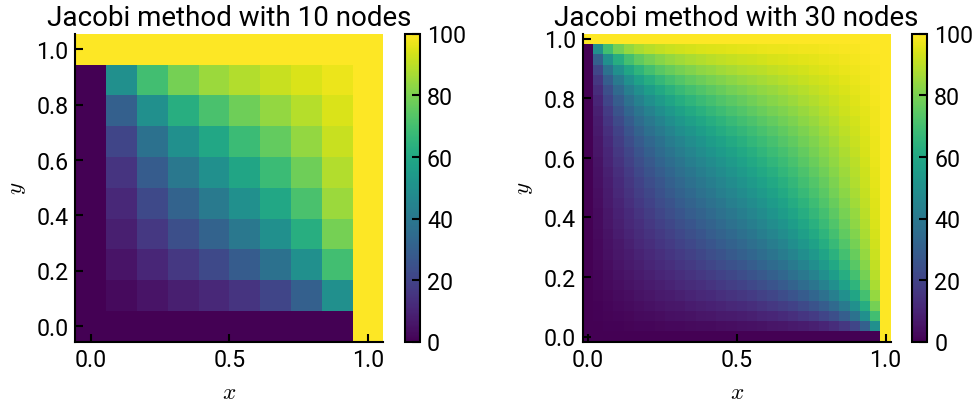

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for k,nodes in enumerate([10, 30]):
    # initialize
    M = nodes
    N = nodes
    u = np.zeros((M, N))
    u[-1, :] = 100
    u[:, -1] = 100

    # loop until convergence
    error = 1
    while error > 0.01:
        u_old = u.copy()    # make a copy of the old array
        for i in range(1, M-1):
            for j in range(1, N-1):
                # Jacobi updates
                u[i,j] = (u_old[i-1,j] + u_old[i+1,j] + u_old[i,j-1] + u_old[i,j+1])/4
        error = np.max(np.abs(u_old - u))

    # make a plot of the grid
    X, Y = np.meshgrid(np.linspace(0, 1, nodes), np.linspace(0, 1, nodes))
    h = ax[k].pcolormesh(X, Y, u)
    fig.colorbar(h)
    ax[k].set(xlabel='$x$', ylabel='$y$', aspect='equal',
              title=f"Jacobi method with {N} nodes")
plt.show()